In [40]:
import pandas as pd

# Remove the limit on the number of rows and columns to display
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [41]:
X_geo = pd.read_csv("data/train.csv")
X_meteo = pd.read_parquet("data/meteo.parquet")

In [42]:
print(X_geo.shape)
print(X_meteo.shape)

(85571, 26)
(695160, 82)


In [43]:
X_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85571 entries, 0 to 85570
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                85571 non-null  object 
 1   France                              85571 non-null  float64
 2   Auvergne-Rhône-Alpes                85571 non-null  float64
 3   Bourgogne-Franche-Comté             85571 non-null  float64
 4   Bretagne                            85571 non-null  float64
 5   Centre-Val de Loire                 85571 non-null  float64
 6   Grand Est                           85571 non-null  float64
 7   Hauts-de-France                     85571 non-null  float64
 8   Normandie                           85571 non-null  float64
 9   Nouvelle-Aquitaine                  85571 non-null  float64
 10  Occitanie                           85571 non-null  float64
 11  Pays de la Loire                    85571

In [44]:
X_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695160 entries, 0 to 695159
Data columns (total 82 columns):
 #   Column                         Non-Null Count   Dtype                        
---  ------                         --------------   -----                        
 0   numer_sta                      695160 non-null  object                       
 1   date                           695160 non-null  datetime64[ms, Europe/Berlin]
 2   pmer                           650676 non-null  float64                      
 3   tend                           686386 non-null  float64                      
 4   cod_tend                       686386 non-null  object                       
 5   dd                             692663 non-null  float64                      
 6   ff                             692750 non-null  float64                      
 7   t                              685752 non-null  float64                      
 8   td                             685259 non-null  float6

In [45]:
X_geo.head()

,date,France,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Grand Est,Hauts-de-France,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Île-de-France,Montpellier Méditerranée Métropole,Métropole Européenne de Lille,Métropole Grenoble-Alpes-Métropole,Métropole Nice Côte d'Azur,Métropole Rennes Métropole,Métropole Rouen Normandie,Métropole d'Aix-Marseille-Provence,Métropole de Lyon,Métropole du Grand Nancy,Métropole du Grand Paris,Nantes Métropole,Toulouse Métropole
0,2017-02-13 01:30:00+01:00,62307.0,8196.0,2606.0,3310.0,2734.0,5905.0,6884.0,4016.0,5778.0,4607.0,3902.0,5086.0,9284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4774.0,NaN,NaN
1,2017-02-13 02:00:00+01:00,61729.0,8248.0,2695.0,3427.0,2657.0,6012.0,6697.0,3995.0,5577.0,4529.0,3962.0,4995.0,8934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4660.0,NaN,NaN
2,2017-02-13 02:30:00+01:00,61430.0,8302.0,2774.0,3281.0,2632.0,5941.0,6636.0,3881.0,5560.0,4509.0,3771.0,5122.0,9023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4625.0,NaN,NaN
3,2017-02-13 03:00:00+01:00,59678.0,8199.0,2663.0,3119.0,2557.0,5857.0,6456.0,3780.0,5368.0,4392.0,3607.0,4846.0,8835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4532.0,NaN,NaN
4,2017-02-13 03:30:00+01:00,58697.0,8186.0,2728.0,3042.0,2511.0,5822.0,6341.0,3709.0,5126.0,4306.0,3510.0,4719.0,8697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4489.0,NaN,NaN


In [46]:
X_meteo.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,ww,w1,w2,n,nbas,hbas,cl,cm,ch,pres,niv_bar,geop,tend24,tn12,tn24,tx12,tx24,tminsol,sw,tw,raf10,rafper,per,etat_sol,ht_neige,ssfrai,perssfrai,rr1,rr3,rr6,rr12,rr24,phenspe1,phenspe2,phenspe3,phenspe4,nnuage1,ctype1,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,coordonnees,nom,type_de_tendance_barometrique,temps_passe_1,temps_present,tc,tn12c,tn24c,tx12c,tx24c,tminsolc,latitude,longitude,altitude,libgeo,codegeo,nom_epci,code_epci,nom_dept,code_dep,nom_reg,code_reg,mois_de_l_annee
0,07020,2017-09-23 02:00:00+02:00,102290.0,0.0,4,160.0,4.9,287.25,283.45,78.0,18000.0,2,0,None,25.0,2,2500.0,30,23,10,102190.0,NaN,None,180.0,NaN,NaN,NaN,NaN,NaN,None,NaN,6.5,7.1,-10.0,None,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,None,2.0,3,2500.0,NaN,None,NaN,NaN,None,NaN,None,None,NaN,b'\x01\x01\x00\x00\x00\x9f9\xebS\x8e\t\xff\xbf...,PTE DE LA HAGUE,"Stationnaire, la pression atmosphérique est la...",Nuages ne couvrant pas plus de la moitié du ci...,État du ciel inchangé dans l’ensemble,14.1,NaN,NaN,NaN,NaN,NaN,49.725167,-1.939833,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,9
1,07558,2017-09-23 02:00:00+02:00,102180.0,-40.0,8,30.0,2.4,285.75,282.95,83.0,20000.0,0,None,None,NaN,None,NaN,None,None,None,93940.0,NaN,None,160.0,NaN,NaN,NaN,NaN,283.75,None,NaN,3.5,3.5,-10.0,None,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN,"b""\x01\x01\x00\x00\x00\x0e-\xb2\x9d\xef'\x08@\...",MILLAU,"Stationnaire ou en hausse, puis en baisse, ou ...",None,On n’a pas observé d’évolution des nuages ou o...,12.6,NaN,NaN,NaN,NaN,10.6,44.118500,3.019500,712,Millau,12145,CC de Millau Grands Causses,241200567,Aveyron,12,Occitanie,76,9
2,07661,2017-09-23 05:00:00+02:00,102090.0,-110.0,7,60.0,3.4,289.85,288.75,93.0,NaN,0,2,None,90.0,7,800.0,36,None,None,100500.0,NaN,None,150.0,NaN,NaN,NaN,NaN,NaN,None,NaN,4.5,4.8,-10.0,None,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,None,7.0,7,600.0,NaN,None,NaN,NaN,None,NaN,None,None,NaN,"b""\x01\x01\x00\x00\x00\x82\xfd\xd7\xb9i\xc3\x1...",CAP CEPET,En baisse,Nuages couvrant plus de la moitié du ciel pend...,On n’a pas observé d’évolution des nuages ou o...,16.7,NaN,NaN,NaN,NaN,NaN,43.079333,5.940833,115,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93,9
3,07117,2017-09-23 08:00:00+02:00,102070.0,-50.0,6,90.0,1.9,283.55,281.85,89.0,NaN,None,None,None,NaN,None,NaN,None,None,None,101360.0,NaN,None,-140.0,283.55,NaN,288.65,NaN,NaN,None,NaN,2.9,3.2,-10.0,None,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN,b'\x01\x01\x00\x00\x00\x18_\xb4\xc7\x0b\xc9\x0...,PLOUMANAC'H,"En baisse, puis stationnaire, ou en baisse, pu...",None,None,10.4,10.4,NaN,15.5,NaN,NaN,48.825833,-3.473167,55,Perros-Guirec,22168,CA Lannion-Trégor Communauté,200065928,Côtes-d'Armor,22,Bretagne,53,9
4,07621,2017-09-23 11:00:00+02:00,101950.0,-30.0,6,340.0,1.0,290.25,286.95,81.0,29000.0,0,None,None,NaN,None,NaN,None,None,None,97720.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,2.6,-10.0,None,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,None,None,NaN,b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00...,TARBES-OSSUN,"En baisse, puis stationnaire, ou en baisse, pu...",None,On n’a pas observé d’évolution des nuages ou o...,17.1,NaN,NaN,NaN,NaN,NaN,43.188000,0.000000,360,Louey,65284,CA Tarbes-Lourdes-Pyrénées,200069300,Hautes-Pyrénées,65,Occitanie,76,9


In [47]:
# Drop all NaN columns
print(X_meteo.shape)

(695160, 82)


In [48]:
nan_percent = X_meteo.isna().mean().sort_values(ascending=False)
print(nan_percent)

sw                               1.000000
tw                               1.000000
phenspe4                         1.000000
phenspe3                         1.000000
phenspe2                         1.000000
phenspe1                         1.000000
nnuage4                          0.996566
hnuage4                          0.996566
tx24c                            0.992228
tn24c                            0.992228
tx24                             0.992228
tn24                             0.992228
niv_bar                          0.991822
ctype4                           0.968504
ctype3                           0.966570
geop                             0.958470
perssfrai                        0.939784
ssfrai                           0.939784
ctype2                           0.926772
ch                               0.902614
w2                               0.895812
cm                               0.883812
hnuage3                          0.869864
nnuage3                          0

In [49]:
# On drop les features avec >90% de NaN, features peu utiles par ailleurs
X_meteo.drop(columns=nan_percent[nan_percent > 0.9].index, inplace=True)
X_meteo.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,ww,w1,w2,n,nbas,hbas,cl,cm,pres,tend24,tn12,tx12,tminsol,raf10,rafper,per,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24,nnuage1,ctype1,hnuage1,nnuage2,hnuage2,nnuage3,hnuage3,coordonnees,nom,type_de_tendance_barometrique,temps_passe_1,temps_present,tc,tn12c,tx12c,tminsolc,latitude,longitude,altitude,libgeo,codegeo,nom_epci,code_epci,nom_dept,code_dep,nom_reg,code_reg,mois_de_l_annee
0,07020,2017-09-23 02:00:00+02:00,102290.0,0.0,4,160.0,4.9,287.25,283.45,78.0,18000.0,2,0,None,25.0,2,2500.0,30,23,102190.0,180.0,NaN,NaN,NaN,6.5,7.1,-10.0,None,NaN,0.0,0.0,0.0,NaN,NaN,2.0,3,2500.0,NaN,NaN,NaN,NaN,b'\x01\x01\x00\x00\x00\x9f9\xebS\x8e\t\xff\xbf...,PTE DE LA HAGUE,"Stationnaire, la pression atmosphérique est la...",Nuages ne couvrant pas plus de la moitié du ci...,État du ciel inchangé dans l’ensemble,14.1,NaN,NaN,NaN,49.725167,-1.939833,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,9
1,07558,2017-09-23 02:00:00+02:00,102180.0,-40.0,8,30.0,2.4,285.75,282.95,83.0,20000.0,0,None,None,NaN,None,NaN,None,None,93940.0,160.0,NaN,NaN,283.75,3.5,3.5,-10.0,None,0.0,0.0,0.0,0.0,0.0,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,"b""\x01\x01\x00\x00\x00\x0e-\xb2\x9d\xef'\x08@\...",MILLAU,"Stationnaire ou en hausse, puis en baisse, ou ...",None,On n’a pas observé d’évolution des nuages ou o...,12.6,NaN,NaN,10.6,44.118500,3.019500,712,Millau,12145,CC de Millau Grands Causses,241200567,Aveyron,12,Occitanie,76,9
2,07661,2017-09-23 05:00:00+02:00,102090.0,-110.0,7,60.0,3.4,289.85,288.75,93.0,NaN,0,2,None,90.0,7,800.0,36,None,100500.0,150.0,NaN,NaN,NaN,4.5,4.8,-10.0,None,NaN,0.0,0.0,0.0,0.0,0.0,7.0,7,600.0,NaN,NaN,NaN,NaN,"b""\x01\x01\x00\x00\x00\x82\xfd\xd7\xb9i\xc3\x1...",CAP CEPET,En baisse,Nuages couvrant plus de la moitié du ciel pend...,On n’a pas observé d’évolution des nuages ou o...,16.7,NaN,NaN,NaN,43.079333,5.940833,115,Saint-Mandrier-sur-Mer,83153,Métropole Toulon-Provence-Méditerranée,248300543,Var,83,Provence-Alpes-Côte d'Azur,93,9
3,07117,2017-09-23 08:00:00+02:00,102070.0,-50.0,6,90.0,1.9,283.55,281.85,89.0,NaN,None,None,None,NaN,None,NaN,None,None,101360.0,-140.0,283.55,288.65,NaN,2.9,3.2,-10.0,None,NaN,0.0,0.0,0.0,0.0,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,b'\x01\x01\x00\x00\x00\x18_\xb4\xc7\x0b\xc9\x0...,PLOUMANAC'H,"En baisse, puis stationnaire, ou en baisse, pu...",None,None,10.4,10.4,15.5,NaN,48.825833,-3.473167,55,Perros-Guirec,22168,CA Lannion-Trégor Communauté,200065928,Côtes-d'Armor,22,Bretagne,53,9
4,07621,2017-09-23 11:00:00+02:00,101950.0,-30.0,6,340.0,1.0,290.25,286.95,81.0,29000.0,0,None,None,NaN,None,NaN,None,None,97720.0,NaN,NaN,NaN,NaN,NaN,2.6,-10.0,None,0.0,0.0,0.0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00...,TARBES-OSSUN,"En baisse, puis stationnaire, ou en baisse, pu...",None,On n’a pas observé d’évolution des nuages ou o...,17.1,NaN,NaN,NaN,43.188000,0.000000,360,Louey,65284,CA Tarbes-Lourdes-Pyrénées,200069300,Hautes-Pyrénées,65,Occitanie,76,9


In [50]:
# Drop les colonnes géo redondantes; on garde le nom_dept, nom_region (redondant? mais utile pour le join?), longi/lati (utile pour les villes?)
# Pas mal de noms epci mais au final c'est juste des doublons formattés différemment
X_meteo.drop(
    columns=[
        "numer_sta",
        "coordonnees",
        "nom",
        "libgeo",
        "codegeo",
        "code_epci",
        "code_dep",
        "code_reg",
        "nom_epci",
    ],
    inplace=True,
)
# Drop var inutiles
X_meteo.drop(columns=["mois_de_l_annee", "t", "tminsol",
                      "tn12", "tx12"], inplace=True)

In [51]:
new_order = ['date', 'nom_dept', 'nom_reg', 'latitude', 'longitude',
        'altitude', 'pmer', 'tend', 'cod_tend',
        'dd', 'ff', 'td', 'u', 'vv',
       'n', 'nbas', 'hbas', 'cl', 'cm', 'pres', 'tend24',
       'raf10', 'rafper', 'per', 'etat_sol',
       'ht_neige', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'nnuage1', 'ctype1',
       'hnuage1', 'nnuage2', 'hnuage2', 'nnuage3', 'hnuage3',
       'type_de_tendance_barometrique', 'temps_present', 'ww', 'temps_passe_1',
       'w1', 'w2', 'tc',
       'tn12c', 'tx12c', 'tminsolc']
X_meteo = X_meteo[new_order]

In [52]:
# S'occuper de temps_present / passe et ww / w1 / w2
# Vraiment pas bcp de w1, w2 donc tout drop sauf temps présent
col = ["ww", "w1", "w2", "temps_passe_1"]
X_meteo.drop(columns=col, inplace=True)
X_meteo.head()

,date,nom_dept,nom_reg,latitude,longitude,altitude,pmer,tend,cod_tend,dd,ff,td,u,vv,n,nbas,hbas,cl,cm,pres,tend24,raf10,rafper,per,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24,nnuage1,ctype1,hnuage1,nnuage2,hnuage2,nnuage3,hnuage3,type_de_tendance_barometrique,temps_present,tc,tn12c,tx12c,tminsolc
0,2017-09-23 02:00:00+02:00,Manche,Normandie,49.725167,-1.939833,6,102290.0,0.0,4,160.0,4.9,283.45,78.0,18000.0,25.0,2,2500.0,30,23,102190.0,180.0,6.5,7.1,-10.0,None,NaN,0.0,0.0,0.0,NaN,NaN,2.0,3,2500.0,NaN,NaN,NaN,NaN,"Stationnaire, la pression atmosphérique est la...",État du ciel inchangé dans l’ensemble,14.1,NaN,NaN,NaN
1,2017-09-23 02:00:00+02:00,Aveyron,Occitanie,44.118500,3.019500,712,102180.0,-40.0,8,30.0,2.4,282.95,83.0,20000.0,NaN,None,NaN,None,None,93940.0,160.0,3.5,3.5,-10.0,None,0.0,0.0,0.0,0.0,0.0,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,"Stationnaire ou en hausse, puis en baisse, ou ...",On n’a pas observé d’évolution des nuages ou o...,12.6,NaN,NaN,10.6
2,2017-09-23 05:00:00+02:00,Var,Provence-Alpes-Côte d'Azur,43.079333,5.940833,115,102090.0,-110.0,7,60.0,3.4,288.75,93.0,NaN,90.0,7,800.0,36,None,100500.0,150.0,4.5,4.8,-10.0,None,NaN,0.0,0.0,0.0,0.0,0.0,7.0,7,600.0,NaN,NaN,NaN,NaN,En baisse,On n’a pas observé d’évolution des nuages ou o...,16.7,NaN,NaN,NaN
3,2017-09-23 08:00:00+02:00,Côtes-d'Armor,Bretagne,48.825833,-3.473167,55,102070.0,-50.0,6,90.0,1.9,281.85,89.0,NaN,NaN,None,NaN,None,None,101360.0,-140.0,2.9,3.2,-10.0,None,NaN,0.0,0.0,0.0,0.0,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,"En baisse, puis stationnaire, ou en baisse, pu...",None,10.4,10.4,15.5,NaN
4,2017-09-23 11:00:00+02:00,Hautes-Pyrénées,Occitanie,43.188000,0.000000,360,101950.0,-30.0,6,340.0,1.0,286.95,81.0,29000.0,NaN,None,NaN,None,None,97720.0,NaN,NaN,2.6,-10.0,None,0.0,0.0,0.0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,"En baisse, puis stationnaire, ou en baisse, pu...",On n’a pas observé d’évolution des nuages ou o...,17.1,NaN,NaN,NaN


In [53]:
lat = X_meteo["latitude"].unique()
longi = X_meteo["longitude"].unique()
lat.shape, longi.shape
sorted(longi)

[np.float64(-4.412),
 np.float64(-3.473167),
 np.float64(-3.218333),
 np.float64(-1.939833),
 np.float64(-1.734),
 np.float64(-1.608833),
 np.float64(-1.4115),
 np.float64(-0.691333),
 np.float64(-0.500167),
 np.float64(-0.456167),
 np.float64(0.0),
 np.float64(0.110167),
 np.float64(0.314333),
 np.float64(0.727333),
 np.float64(1.106833),
 np.float64(1.175),
 np.float64(1.181667),
 np.float64(1.378833),
 np.float64(1.396666999999999),
 np.float64(1.396667),
 np.float64(1.834),
 np.float64(2.359833),
 np.float64(2.384333),
 np.float64(2.872833),
 np.float64(3.0195),
 np.float64(3.0975),
 np.float64(3.149333),
 np.float64(3.764),
 np.float64(3.7640000000000002),
 np.float64(3.963167),
 np.float64(4.02),
 np.float64(4.155333),
 np.float64(4.733),
 np.float64(5.077833),
 np.float64(5.088333),
 np.float64(5.216),
 np.float64(5.940833),
 np.float64(5.959833),
 np.float64(6.502333),
 np.float64(7.209),
 np.float64(7.51),
 np.float64(7.640333)]

In [54]:
X_meteo.loc[X_meteo['longitude'] == '1.396666999999999', 'longitude'] = '1.396667'
X_meteo.loc[X_meteo['longitude'] == '3.7640000000000002', 'longitude'] = '3.764'
lat = X_meteo["latitude"].unique()
longi = X_meteo["longitude"].unique()
print(lat.shape, longi.shape)
print(sorted(longi))

(40,) (42,)
[-4.412, -3.473167, -3.218333, -1.939833, -1.734, -1.608833, -1.4115, -0.691333, -0.500167, -0.456167, 0.0, 0.110167, 0.314333, 0.727333, 1.106833, 1.175, 1.181667, 1.378833, 1.396666999999999, 1.396667, 1.834, 2.359833, 2.384333, 2.872833, 3.0195, 3.0975, 3.149333, 3.764, 3.7640000000000002, 3.963167, 4.02, 4.155333, 4.733, 5.077833, 5.088333, 5.216, 5.940833, 5.959833, 6.502333, 7.209, 7.51, 7.640333]


/var/folders/w3/35g460n15gjb4kbyt605mmw80000gn/T/ipykernel_24221/644887345.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.396667' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_meteo.loc[X_meteo['longitude'] == '1.396666999999999', 'longitude'] = '1.396667'


In [55]:
X_meteo.loc[X_meteo['longitude'] == '1.396667']

,date,nom_dept,nom_reg,latitude,longitude,altitude,pmer,tend,cod_tend,dd,ff,td,u,vv,n,nbas,hbas,cl,cm,pres,tend24,raf10,rafper,per,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24,nnuage1,ctype1,hnuage1,nnuage2,hnuage2,nnuage3,hnuage3,type_de_tendance_barometrique,temps_present,tc,tn12c,tx12c,tminsolc


In [56]:
print(sorted(longi))

[-4.412, -3.473167, -3.218333, -1.939833, -1.734, -1.608833, -1.4115, -0.691333, -0.500167, -0.456167, 0.0, 0.110167, 0.314333, 0.727333, 1.106833, 1.175, 1.181667, 1.378833, 1.396666999999999, 1.396667, 1.834, 2.359833, 2.384333, 2.872833, 3.0195, 3.0975, 3.149333, 3.764, 3.7640000000000002, 3.963167, 4.02, 4.155333, 4.733, 5.077833, 5.088333, 5.216, 5.940833, 5.959833, 6.502333, 7.209, 7.51, 7.640333]


ValueError: x and y must be the same size

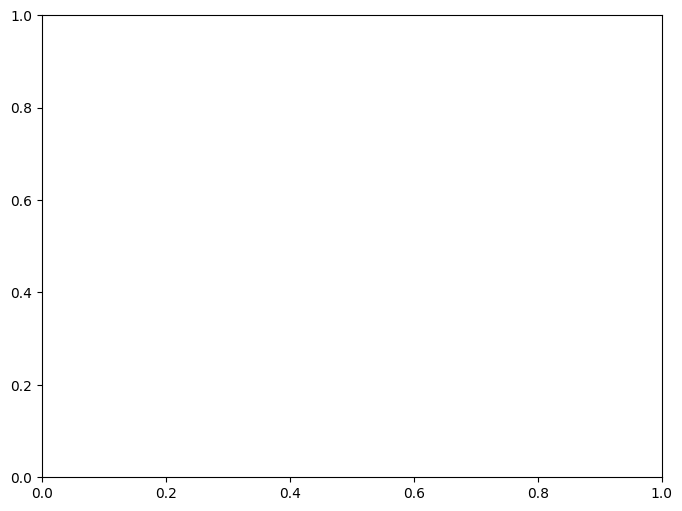

In [57]:
import matplotlib.pyplot as plt

# Example longitude and latitude data
lons = [-73.935242, -118.243683, -0.127758]
lats = [40.730610, 34.052235, 51.507351]

plt.figure(figsize=(8, 6))
plt.scatter(longi, lat, color='red')
plt.title('Scatter Plot of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
